In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

#normalize the images
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#define a simple model: 1 dense layer with 10 layers
#we use Flatten to resize the 28x28 pixel images into 784 flattened arrays

model = K.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#since test labels are integral values, we use sparse categorical crossentropy with logits set to True
model.compile(optimizer = 'Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

history = model.fit(x = train_data, y = train_labels, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.5144 - accuracy: 0.8689 - val_loss: 0.3212 - val_accuracy: 0.9092
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3178 - accuracy: 0.9119 - val_loss: 0.2877 - val_accuracy: 0.9198
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.9187 - val_loss: 0.2746 - val_accuracy: 0.9237
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.9207 - val_loss: 0.2711 - val_accuracy: 0.9240
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9229 - val_loss: 0.2679 - val_accuracy: 0.9265
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2685 - accuracy: 0.9251 - val_loss: 0.2646 - val_accuracy: 0.9273
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2637 - accuracy: 0.9259 - val_loss: 0.2623 - val_accuracy: 0.9297
Epo

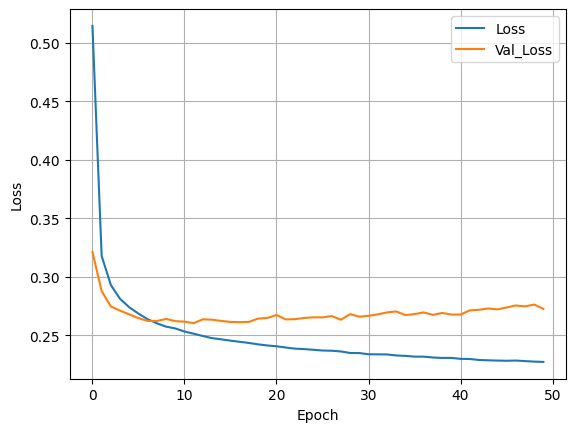

In [ ]:
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Val_Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

Note that in the graph above, the validation loss diverges from the training data loss, indicating that our model is overfitting the training data. To improve performance, we can add hidden layers.

In [ ]:
#utility functions to help visualize the handwritten digits and the probability of the 10 units in the output

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap =  plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label, 100*np.max(predictions_array), true_label), color = color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

313/313 [==============================] - 1s 2ms/step


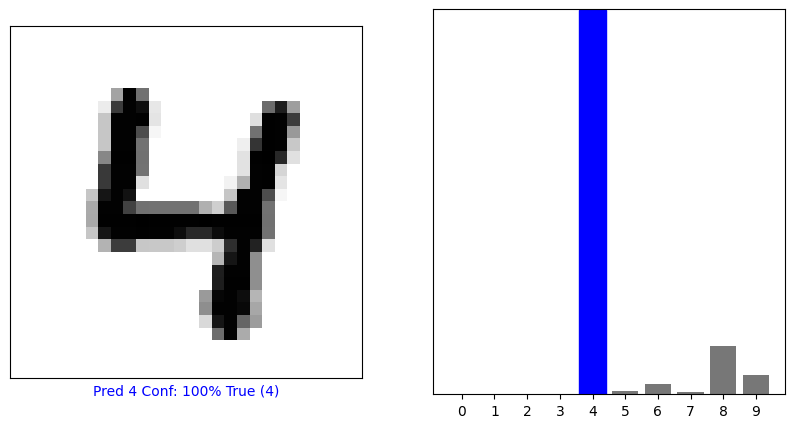

In [ ]:
predictions = model.predict(test_data)
i = 56
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [ ]:
#For better performance, use this model which has another hidden layer and uses softmax
better_model = K.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

better_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
